In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot, pie_chart

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head(10)

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q4_ML_Life_Cycle_Main_Problems_Model_Monitoring_Free_Third,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_First,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Second,Q4_ML_Life_Cycle_Main_Problems_Model_Other_Free_Third,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_First,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Second,Q5_ML_Life_Cycle_Main_Problems_Ranking_Free_Third,Q6_ML_Solution_Optimality,Q7_ML_Solution_Optimality_Extra_Effort,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,Feeding the model in appropriate way,-99,-99,-99,Problems with data collection and cleaning,Others tasks which competes the time,Search the appropriate methodology,Frequently,70,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,-99,-99,-99,-99,Data preparation,Prediction Task identification,Selecionar of learning algo,Sometimes,30,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,-99,-99,-99,-99,-99,-99,-99,Sometimes,50,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,-99,-99,-99,-99,understand the pain and identify if ML is real...,we need to cut or we need to cluster some kind...,present and discuss metrics and distribution o...,Sometimes,20,-99
7,53,Completed (31),2097,Information System,-99,M.Sc. in Applied Informatics,-99,-99,-99,Brazil,...,-99,-99,-99,-99,insufficient amount of data,apply the models,Not knowing how to deploy,Sometimes,50,-99
8,58,Completed (31),1696,Computer Science,-99,Computer Science,-99,Microsoft Professional Program Data Science & ...,-99,Germany,...,-99,-99,-99,-99,Data Availability,Sufficient Data Quantity,Deployment Costs for non-trivial ML projects,Sometimes,30,https://t.co/
9,64,Completed (31),1250,Electrical and Electronics Engineering,-99,M.Sc. in AI and Software Engineering,Computer science,"Azure Associate AI Engineer, Azure Data Scienc...",-99,Sweden,...,-99,-99,-99,-99,"Basic: no proper engagement from management, n...",Understand the context,-99,Sometimes,50,https://www.linkedin.com/
10,65,Completed (31),106,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,-99
11,69,Completed (31),79,-99,-99,-99,-99,-99,-99,0,...,-99,-99,-99,-99,-99,-99,-99,Never,-77,https://ww2.unipark.de/uc/seml/


In [4]:
df[['D13_ML_Programming_Language_C', 'D13_ML_Programming_Language_Java', 'D13_ML_Programming_Language_Javascript', 
    'D13_ML_Programming_Language_Julia', 'D13_ML_Programming_Language_MatLab', 'D13_ML_Programming_Language_Python', 
    'D13_ML_Programming_Language_R', 'D13_ML_Programming_Language_Others']].head()

,D13_ML_Programming_Language_C,D13_ML_Programming_Language_Java,D13_ML_Programming_Language_Javascript,D13_ML_Programming_Language_Julia,D13_ML_Programming_Language_MatLab,D13_ML_Programming_Language_Python,D13_ML_Programming_Language_R,D13_ML_Programming_Language_Others
2,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted
3,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
4,quoted,not quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted
5,not quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted
6,not quoted,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted


In [5]:
print(df['D13_ML_Programming_Language_C'].value_counts())
print()
print("Total de Questões marcadas: " + str(df['D13_ML_Programming_Language_C'].value_counts()['quoted']))

not quoted    232
quoted         44
Name: D13_ML_Programming_Language_C, dtype: int64

Total de Questões marcadas: 44


In [6]:
languages = ['C/C++', 'Java', 'Javascript', 'Julia', 'Matlab', 'Python', 'R', 'Others']

In [7]:
# the values follow the same position of previous declared list
languages_total = [
    df['D13_ML_Programming_Language_C'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Java'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Javascript'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Julia'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_MatLab'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_Python'].value_counts()['quoted'],
    df['D13_ML_Programming_Language_R'].value_counts()['quoted'],
    df['D12_ML_Project_Context_Others'].value_counts()['quoted']
]

In [8]:
# dataframe specific for question D13
d13_df= pd.DataFrame(data={'Main Languages': languages, 'Answers': languages_total})

In [9]:
d13_df

,Main Languages,Answers
0,C/C++,44
1,Java,44
2,Javascript,45
3,Julia,3
4,Matlab,16
5,Python,222
6,R,54
7,Others,80


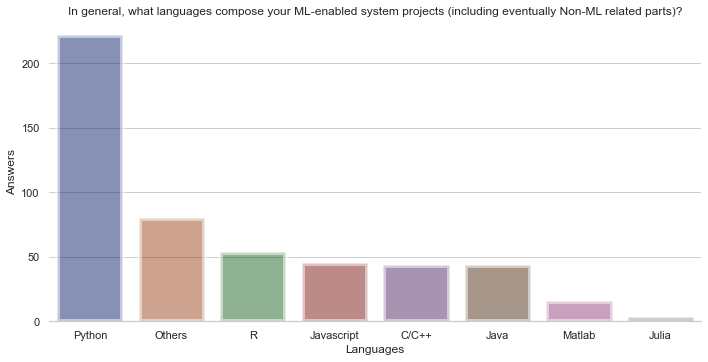

In [10]:
# we sort the dataframe to plot the bars decreasingly
single_barplot(d13_df.sort_values(by=['Answers'], ascending=False), "Main Languages", "Answers", 
               title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?",
               x_label="Languages", y_label="Answers")

In [11]:
# normalize to the sum become 100
sum_values = sum(d13_df['Answers'])
normalized_values = [(float(v)/sum_values)* 100 for v in d13_df['Answers']]

In [12]:
normalized_values

[8.661417322834646,
 8.661417322834646,
 8.858267716535433,
 0.5905511811023622,
 3.149606299212598,
 43.7007874015748,
 10.62992125984252,
 15.748031496062993]

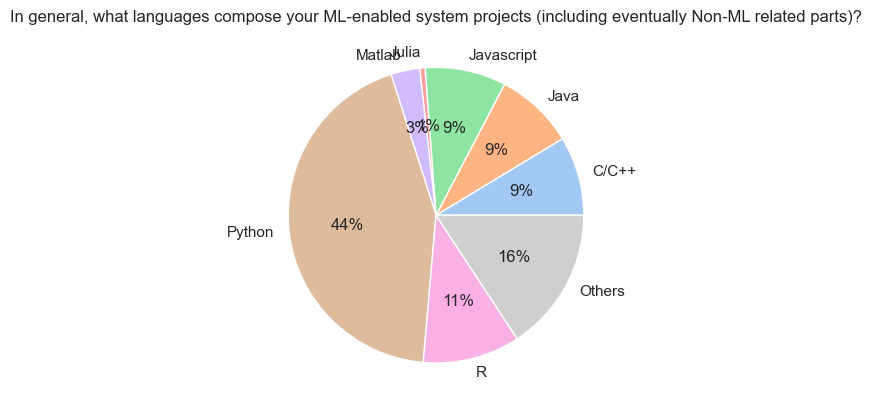

In [13]:
pie_chart(normalized_values, d13_df['Main Languages'], 
          title="In general, what languages compose your ML-enabled system projects (including eventually Non-ML related parts)?")